<a href="https://colab.research.google.com/github/japarra27/ML_Techniques/blob/main/ML_Techniques_Laboratorio_IV_Problema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://i.ibb.co/5cF0YCC/Laboratorio-ML.png" alt="Laboratorio-ML" border="0"></a>

# Machine Learning Techniques - ISIS4219

Segundo Semestre - 2021

## **Laboratorio 4**

## Integrantes

* Cesar Augusto Vega Fernandez - 200917202
* Jaime Andrés Parra Mora - 202107161
* Juan Camilo Sanguino - 201617597

## **Contenido**
1. [**Problema**](#id1)
2. [**Importando las librerías necesarias para el laboratorio**](#id2)
3. [**Cargue y ajuste de datos**](#id3)
4. [**Visualización y Análisis Exploratorio**](#id4)
5. [**Preparación de datos**](#id5)
6. [**Modelamiento - búsqueda de hiperparámetros**](#id6)
7. [**Modelamiento basado en los resultados del gridsearch**](#id7)
8. [**Estimación de métricas y análisis de errores**](#id8)
9. [**Conclusiones**](#id9)

## **Problema**<a name="id1"></a>

- <p align = "justify">Para los bancos es sumamente importante reconocer transacciones fraudulentas con el objetivo de que los clientes no paguen por cosas que no compraron. Con respecto a lo anterior, se recogieron datos de más de 200 mil transacciones con un porcentaje de 0.172% de transacciones fraudulentas. Dada la baja cantidad de fraudes, se le pidió a ud que creara un modelo de inteligencia artificial para poder detectar este tipo de anomalías.</p>

> [Link del dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## **Importando las librerías necesarias para el laboratorio**<a name="id2"></a>

In [ ]:
%%shell
pip install --progress-bar off -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
pip install --progress-bar off -q tqdm==4.56.0
shred -u setup_colab_general.py
wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py

In [ ]:
import numpy as np
import pandas as pd

import os

import setup_colab_general as setup_general

setup_general.setup_general()

from warnings import filterwarnings

filterwarnings("ignore")


import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn-deep")
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    accuracy_score,
    recall_score,
    classification_report,
)

from sklearn.preprocessing import MinMaxScaler

import utils.general as gen

import pandas_profiling

from sklearn.model_selection import (
    StratifiedShuffleSplit,
    RandomizedSearchCV,
    GridSearchCV,
)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



  0%|          | 0/3 [00:00<?, ?KB/s]

General Functions Enabled Successfully


## **Cargue y ajuste de datos**<a name="id3"></a>

In [ ]:
#Descarga del dataset sin  Duplicados
data_id = "1zwWyo9pI-L6vhQjX3RtIfCxfSnw3GGsc"

In [ ]:
gen.download_file_from_google_drive(data_id, "BotNeTIoT-L01_label_NoDuplicates.csv")

0KB [00:00, ?KB/s]

In [ ]:
iot_data = pd.read_csv('data/BotNeTIoT-L01_label_NoDuplicates.csv', sep=',')

In [ ]:
iot_data.head()

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.00000,98.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,98.0,0.000000,98.000000,0.000000e+00,0.0,0.0,0
1,1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.93164,98.0,1.348699e-06,...,7.263102e+08,5.662344e+17,1.93164,98.0,0.000001,138.592929,1.818989e-12,0.0,0.0,0
2,2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.00000,66.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,66.0,0.000000,114.856432,0.000000e+00,0.0,0.0,0
3,3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.00000,74.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0
4,4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.00000,74.0,9.536743e-07,...,7.529571e+08,5.669445e+17,1.00000,74.0,0.000000,74.000000,0.000000e+00,0.0,0.0,0


In [ ]:
#Confirma tipo de dato
iot_data.dtypes

Unnamed: 0                int64
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
label                     int64
dtype: object

## **Visualización y Análisis Exploratorio**<a name="id4"></a>

In [ ]:
pandas_profiling.ProfileReport(iot_data, minimal=True, dark_mode=True)

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

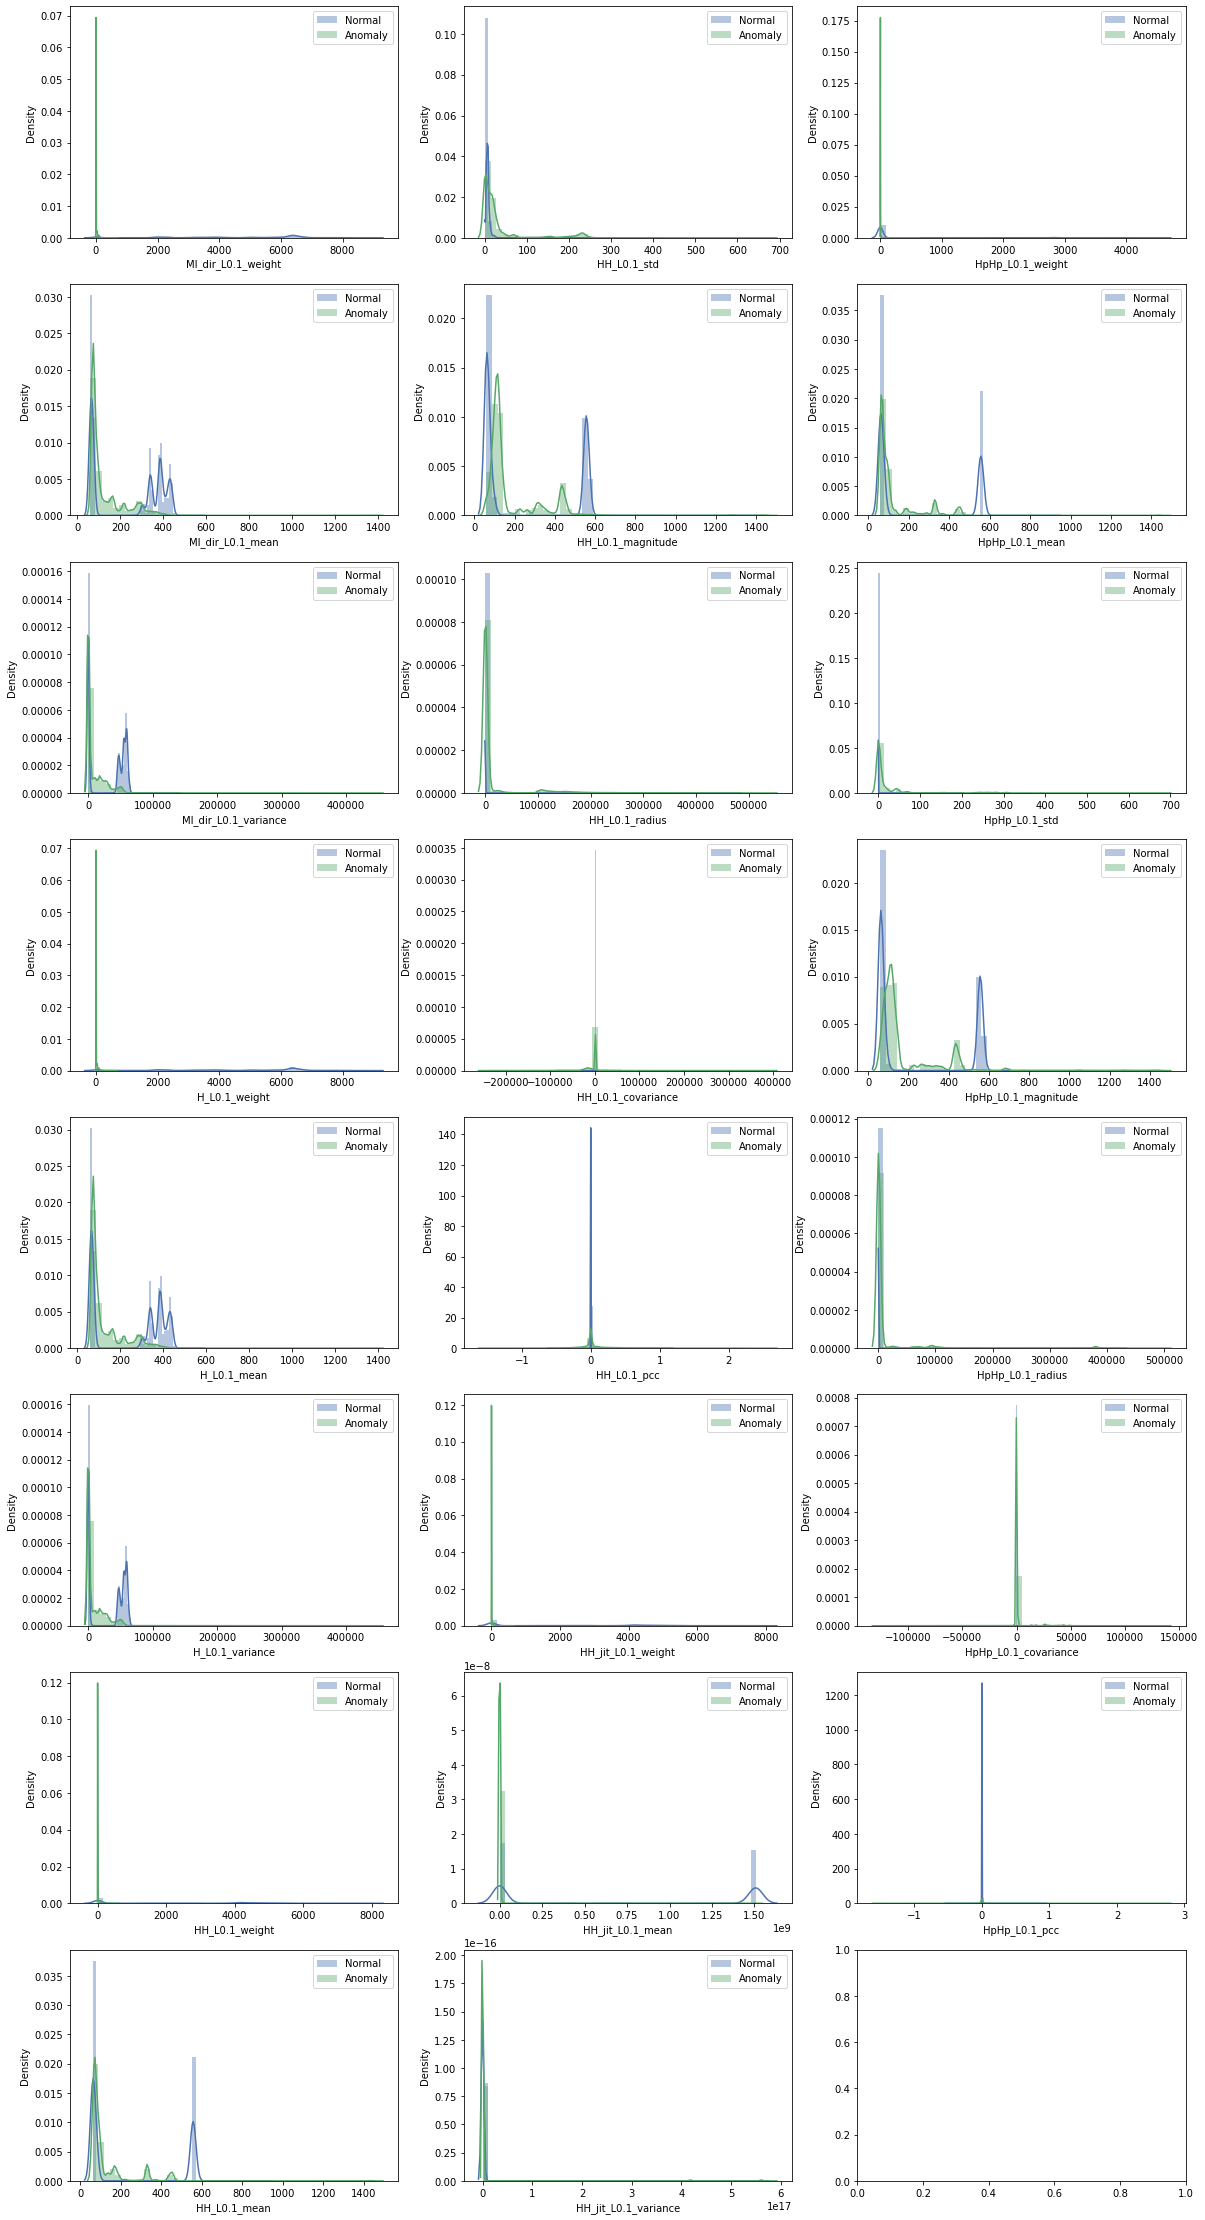

In [ ]:
X = iot_data.drop(columns=["label","Unnamed: 0"])
y = iot_data["label"]

fig, ax = plt.subplots(8, 3, figsize=(5 * 4, 5 * 8))

count = 0

for idx, (col_name, col_data) in enumerate(X.iteritems()):
    
    sns.distplot(col_data[y==0], ax=ax[idx % 8][count], label="Normal")
    sns.distplot(col_data[y==1], ax=ax[idx % 8][count], label="Anomaly")
    ax[idx % 8][count].legend(loc="best")

    if (idx + 1) % 8 == 0:
        count += 1

## Preparación de datos <a name="id5"></a>

### Estandarización de variables

In [ ]:
scaled_features = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [ ]:
print(f"% Y 1 : {y.mean() * 100}")
print(f"% Y 0 : {(1 - y.mean()) * 100}")

% Y 1 : 21.161398745721332
% Y 0 : 78.83860125427866


### Eliminación de columnas que no aportan al análisis

In [ ]:
#Se eliminan estas variables porque su comportamiento no permite identificar claramente las diferencias entre ataque y comportamiento normal
columns_to_drop = ["HH_L0.1_radius", "HpHp_L0.1_covariance", "HpHp_L0.1_radius", "HH_jit_L0.1_variance"]

In [ ]:
X.drop(columns=columns_to_drop, inplace=True)

### Generación del train-test-split

In [ ]:
splitter = StratifiedShuffleSplit(test_size=0.2, random_state=1234)

In [ ]:
X, y = X.values, y.values

In [ ]:
for train_index, test_index in splitter.split(X, y):
    full_X_train, full_y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [ ]:
for train_index, val_index in splitter.split(full_X_train, full_y_train):
    X_train, y_train = full_X_train[train_index], full_y_train[train_index]
    X_val, y_val = full_X_train[val_index], full_y_train[val_index]

## Modelamiento - búsqueda de hiperparámetros <a name="id6"></a>

In [ ]:
# Modelo con optimización de hiperparámetros
def build_model(activation="relu", units=16):
    model = keras.Sequential(
        [
            keras.layers.Dense(
                units * 2 * 2, activation=activation, kernel_initializer="he_normal"
            ),
            keras.layers.Dense(
                units * 2, activation=activation, kernel_initializer="he_normal"
            ),
            keras.layers.Dense(
                units, activation=activation, kernel_initializer="he_normal"
            ),
            keras.layers.Dense(
                units * 2, activation=activation, kernel_initializer="he_normal"
            ),
            keras.layers.Dense(
                units * 2 * 2, activation=activation, kernel_initializer="he_normal"
            ),
            keras.layers.Dense(19, activation="sigmoid"),
        ]
    )
    model.compile(optimizer="adam", loss="mse", metrics=[keras.metrics.Recall()])
    return model

In [ ]:
# Generación del clasificador
model = KerasClassifier(build_fn=build_model, batch_size=128)

In [ ]:
# Definición grilla de hiperparámetros
param_grid = {
    "activation": ["relu", "elu"],
    "units": [4, 2]
}

In [ ]:
# Definición del early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)

In [ ]:
# Instancia del GridSearch
grid_search = GridSearchCV(model, param_grid)

In [ ]:
# Entrenamiento del modelo
grid_search.fit(  X_train[y_train==0], X_train[y_train==0],
                    validation_data=(X_val[y_val==0], X_val[y_val==0]),
                    epochs=20,
                    batch_size=128,
                  callbacks=[early_stopping])

Epoch 1/20
7653/7653 [==============================] - 8s 983us/step - loss: 0.0037 - recall: 0.1776 - val_loss: 9.9790e-05 - val_recall: 0.1745
Epoch 2/20
7653/7653 [==============================] - 7s 964us/step - loss: 7.0721e-05 - recall: 0.1743 - val_loss: 4.8629e-05 - val_recall: 0.1734
Epoch 3/20
7653/7653 [==============================] - 7s 965us/step - loss: 4.1021e-05 - recall: 0.1746 - val_loss: 3.6709e-05 - val_recall: 0.1745
Epoch 4/20
7653/7653 [==============================] - 7s 958us/step - loss: 3.3076e-05 - recall: 0.1746 - val_loss: 3.0267e-05 - val_recall: 0.1746
Epoch 5/20
7653/7653 [==============================] - 7s 961us/step - loss: 2.9358e-05 - recall: 0.1746 - val_loss: 3.0074e-05 - val_recall: 0.1738
Epoch 6/20
7653/7653 [==============================] - 7s 979us/step - loss: 2.5307e-05 - recall: 0.1746 - val_loss: 2.3868e-05 - val_recall: 0.1744
Epoch 7/20
7653/7653 [==============================] - 8s 986us/step - loss: 2.3750e-05 - recall: 0.174

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f46e565e220>,
             param_grid={'activation': ['relu', 'elu'], 'units': [4, 2]})

In [ ]:
print(f"Mejor modelo {grid_search.best_params_}")

Mejor modelo {'activation': 'relu', 'units': 4}


## **Modelamiento basado en los resultados del gridsearch**<a name="id7"></a>

In [ ]:
# Definición del autoencoder
class Autoencoder(keras.Model):
    def __init__(self, n_out: int):
        super(Autoencoder, self).__init__()

        self.encoder = keras.Sequential([
            keras.layers.Dense(4, activation="relu",kernel_initializer="he_normal"),
            keras.layers.Dense(2, activation="relu",kernel_initializer="he_normal"),
        ])
        self.decoder = keras.Sequential([
            keras.layers.Dense(4, activation="relu",kernel_initializer="he_normal"),
            keras.layers.Dense(n_out, activation="sigmoid"),
        ])

    def call(
        self, inputs: tf.Tensor
    ) -> tf.Tensor:
        inputs = self.encoder(inputs)
        return self.decoder(inputs)

In [ ]:
# Compilación del modelo
model = Autoencoder(X.shape[-1])

model.compile(loss="mse", optimizer="adam", metrics=[keras.metrics.Recall()])

In [ ]:
# Entrenamiento del modelo
history = model.fit(
    X_train[y_train==0], X_train[y_train==0],
    validation_data=(X_val[y_val==0], X_val[y_val==0]),
    epochs=20,
    batch_size=128,
    callbacks=[early_stopping]
)

Epoch 1/20
9566/9566 [==============================] - 9s 898us/step - loss: 0.0249 - recall_21: 0.1553 - val_loss: 7.6726e-04 - val_recall_21: 0.1744
Epoch 2/20
9566/9566 [==============================] - 9s 894us/step - loss: 5.5899e-04 - recall_21: 0.1737 - val_loss: 4.1445e-04 - val_recall_21: 0.1733
Epoch 3/20
9566/9566 [==============================] - 8s 887us/step - loss: 3.8685e-04 - recall_21: 0.1732 - val_loss: 3.7256e-04 - val_recall_21: 0.1724
Epoch 4/20
9566/9566 [==============================] - 9s 892us/step - loss: 3.5794e-04 - recall_21: 0.1731 - val_loss: 3.5292e-04 - val_recall_21: 0.1733
Epoch 5/20
9566/9566 [==============================] - 8s 868us/step - loss: 3.4418e-04 - recall_21: 0.1731 - val_loss: 3.4085e-04 - val_recall_21: 0.1732
Epoch 6/20
9566/9566 [==============================] - 8s 867us/step - loss: 3.3427e-04 - recall_21: 0.1732 - val_loss: 3.2642e-04 - val_recall_21: 0.1729
Epoch 7/20
9566/9566 [==============================] - 8s 880us/ste

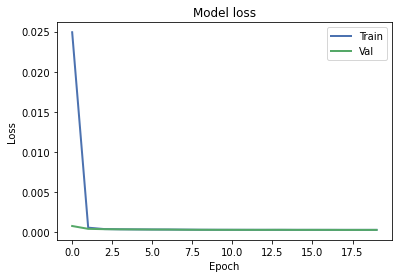

In [ ]:
# Gráfico validación perdida del modelo
plt.plot(history.history['loss'], linewidth=2, label='Train')
plt.plot(history.history['val_loss'], linewidth=2, label='Val')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

## Estimación de métricas y análisis de errores<a name="id8"></a>

In [ ]:
encoder_out = model.encoder(
    X_test[y_test==0][0].reshape(-1, X_test.shape[-1])
)
decoder_out = model.decoder(encoder_out)

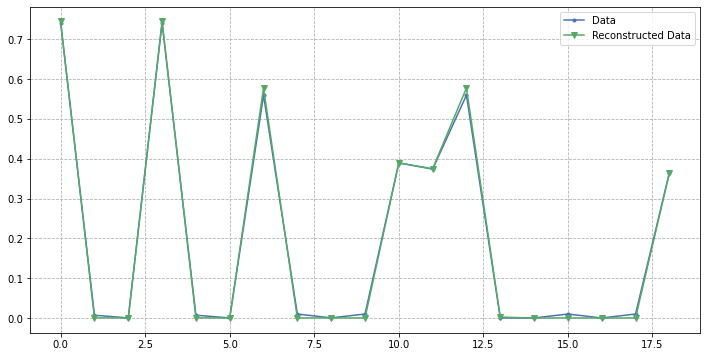

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[y_test==0][0], ".-", label="Data")
plt.plot(decoder_out[0], "v-", label="Reconstructed Data")
plt.legend(loc="best")
plt.grid(linestyle="--")
plt.show()

In [ ]:
normal_reconstructions = model.predict(X_test[y_test==0])

normal_loss = tf.keras.losses.mae(
    normal_reconstructions, X_test[y_test==0]
)

In [ ]:
X_test[y_test==0].shape

(382616, 19)

In [ ]:
normal_loss.shape

TensorShape([382616])

In [ ]:
np.mean(normal_loss)

0.008285373713531163

In [ ]:
np.std(normal_loss)

0.0048121391622068625

In [ ]:
thresh = np.mean(normal_loss) + 2*np.std(normal_loss)

In [ ]:
thresh

0.01790965203794489

In [ ]:
anomaly_reconstructions = model.predict(X_test[y_test==1])

anomaly_loss = tf.keras.losses.mae(
    anomaly_reconstructions, X_test[y_test==1]
)

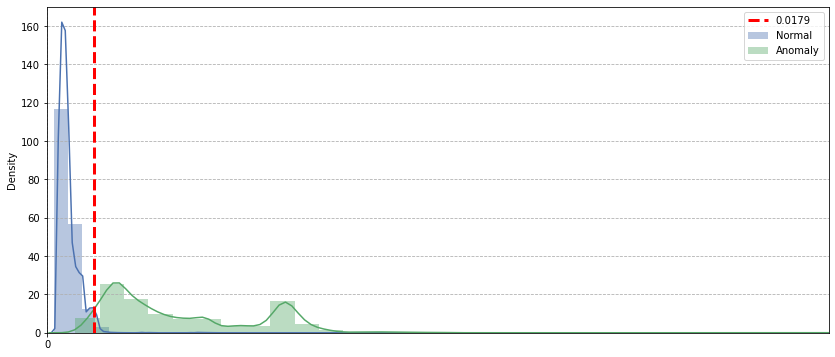

In [ ]:
plt.figure(figsize=(14, 6))
sns.distplot(normal_loss, bins=50, label="Normal")
sns.distplot(anomaly_loss, bins=50, label="Anomaly")
plt.axvline(
    thresh, color="r", linewidth=3, 
    linestyle="--", label=f"{thresh:.4f}"
)
plt.legend(loc="best")
plt.xticks(range(12))
plt.grid(linestyle="--")
plt.xlim((0, 0.3))
plt.show()

## **Conclusiones**<a name="id9"></a>

* Para el caso de los autoencoders, al ser un modelo no supervisado, no se debería validar con métricas o reportes cómo la matriz de confusión dado que esto aplica para modelos supervisados.
* Con base en el gráfico de distribución de las densidades de probabilidad de las anomalias y valores normales, se observa que estas distribuciones son diferentes, lo que permite el poder utilizar un threshold de dos desviaciones para lograr una separación eficiente de anomalias sin castigar a los valores normales. (las anomalias vs valores normales no tienen un overlap significativo).
* Al comparar los valores que se obtienen en la data original vs la reconstruida, vemos que se ajuste de forma rápida, la explicación de este fenómeno se debe a las distribuciones de probablidad de las clases.
* Con el fin de lograr la predicción de las clases, el siguiente paso sería añadir un MLP que nos ayude a realizar la clasificación de anomalias o valores normales.
* El dataset, al ser analizado, se observa que para la clase que corresponde a anomalías, tiene un 21% vs el total de valores, con lo cual aunque el dataset es desbalanceado, tiene muchos más casos vs un ejemplo normal de anomalias que poseen un 1 o 2%.
* Otro punto a tener en cuenta, es que al realizar el entendimiento de los datos (pandas-profiling) los valores no se encuentran normalizados, por eso se realiza el proceso de escalarlos entre 0 y 1.
* Para el caso de la métrica de validación a la hora de entrenar, se modifica por recall debido a que el objetivo es tener la menor cantidad de falsos negativos, dado que es preferible tener alarmas de ataques falsos, en vez de no recibir alarmas por ataques verdaderos.